In [1]:
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

1.26.4


In [2]:
df = pd.read_html("http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html")

In [3]:
store_df = df[0]
store_df.columns = store_df.iloc[0]
store_df = store_df.iloc[1:]
store_df = store_df.astype(float)
store_df = store_df.drop(columns=["Index"])
store_df = store_df.dropna()

In [4]:
store_df.head()

,Height(Inches),Weight(Pounds)
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [5]:
mu_vec = store_df.mean()
print(mu_vec)

0
Height(Inches)     67.993114
Weight(Pounds)    127.079421
dtype: float64


In [6]:
cov_matrix = store_df.cov()
print(cov_matrix)

0               Height(Inches)  Weight(Pounds)
0                                             
Height(Inches)        3.616382       11.151029
Weight(Pounds)       11.151029      135.976532


In [12]:
store_df - mu_vec

,Height(Inches),Weight(Pounds)
1,-2.209804,-14.086921
2,3.522096,9.407879
3,1.405626,25.947479
4,0.223486,15.255979
5,-0.205304,17.217679
...,...,...
24996,1.509036,-9.048221
24997,-3.444854,-6.886221
24998,-3.294564,-8.813921
24999,-0.463934,5.188779


In [13]:
(store_df - mu_vec).shape

(25000, 2)

In [15]:
((store_df - mu_vec).values.T@(store_df - mu_vec).values)/(store_df - mu_vec).shape[0]

array([[  3.61623749,  11.15058313],
       [ 11.15058313, 135.97109293]])

In [16]:
store_df.cov()

,Height(Inches),Weight(Pounds)
0,,
Height(Inches),3.616382,11.151029
Weight(Pounds),11.151029,135.976532


Text(0, 0.5, 'Weight')

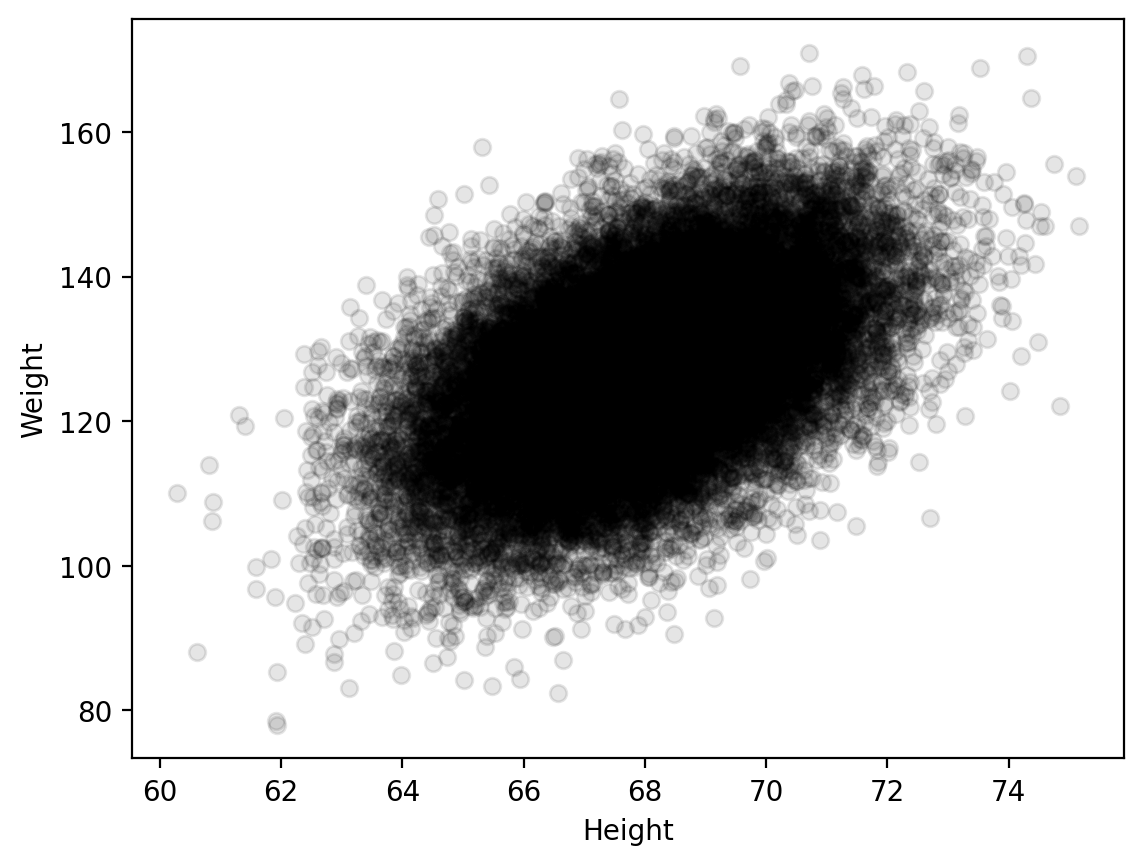

In [11]:
# Plot the data

plt.scatter(store_df["Height(Inches)"], store_df["Weight(Pounds)"], alpha=0.1, color='k')
plt.xlabel("Height")
plt.ylabel("Weight")



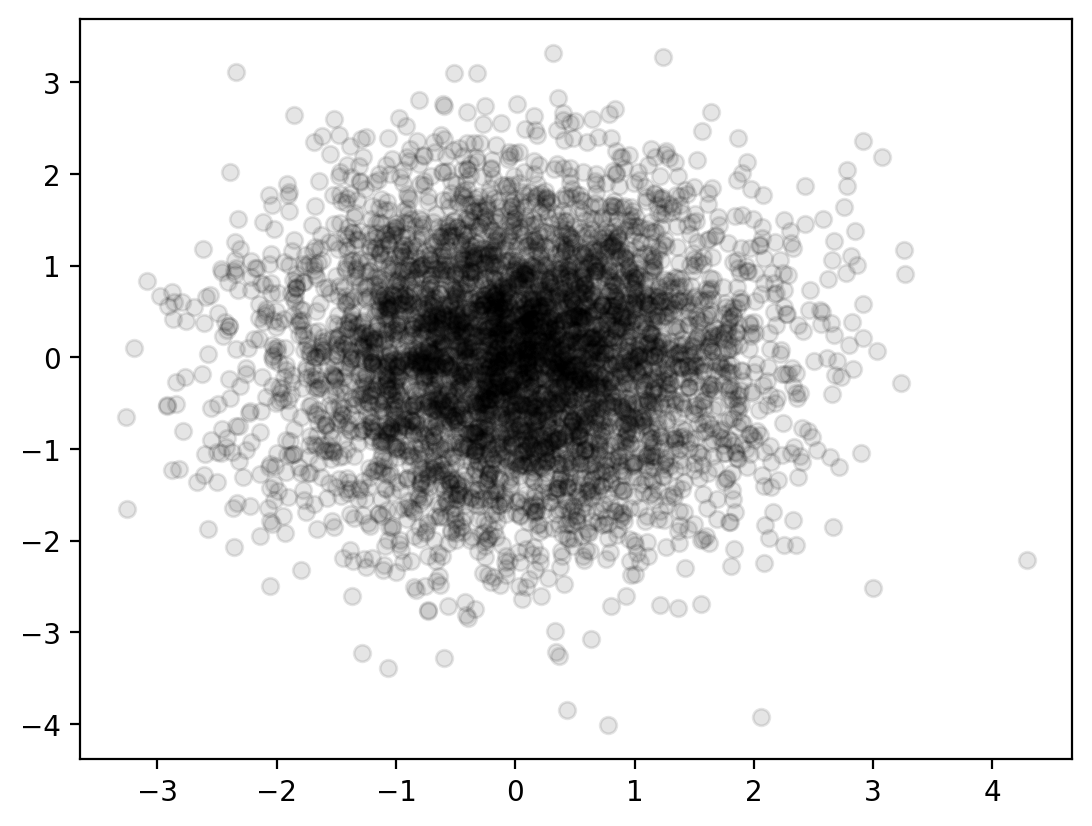

In [19]:
# Diagonal covariance matrix

X = torch.distributions.multivariate_normal.MultivariateNormal(
    loc = torch.tensor([0.0, 0.0]),
    covariance_matrix = torch.tensor([[1.0, 0.0], [0.0, 1.0]])
)

X_samples = X.sample((5000,))
plt.scatter(X_samples[:, 0], X_samples[:, 1], alpha=0.1, color='k')


In [22]:
torch.round(torch.cov(X_samples.T))

tensor([[1., 0.],
        [0., 1.]])